In [27]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import requests
import os
from google.colab import userdata

In [28]:
tng_api_key = userdata.get('TNG_API_KEY')
baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":tng_api_key}

In [29]:
def get(path, params=None):
    headers = {"api-key":tng_api_key}
    r = requests.get(path, params=params, headers=headers)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers: #not only json
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [30]:
r = get(baseUrl)
for simulation in r['simulations']: #only get TNG50
    if simulation['name'] == 'TNG50-1':
        url = simulation['url']
        break
tng50 = get(url)

In [31]:
url = 'http://www.tng-project.org/api/TNG50-1/snapshots/z=1.8/'
snapshot = get(url)

In [35]:
sub_url = f"http://www.tng-project.org/api/TNG50-1/snapshots/{snapshot['number']}/subhalos/0/"
subhalo = get(sub_url)

In [48]:
vis_query1 = "partField=temp&ctName=inferno"
vis_url1 = f"http://www.tng-project.org/api/TNG50-1/snapshots/{snapshot['number']}/subhalos/0/vis.png?{vis_query1}"
vis_r1 = get(vis_url1)

In [45]:
vis_query2 = "partField=vmag&ctName=magma"
vis_url2 = f"http://www.tng-project.org/api/TNG50-1/snapshots/{snapshot['number']}/subhalos/0/vis.png?{vis_query2}"
vis_r2 = get(vis_url2)

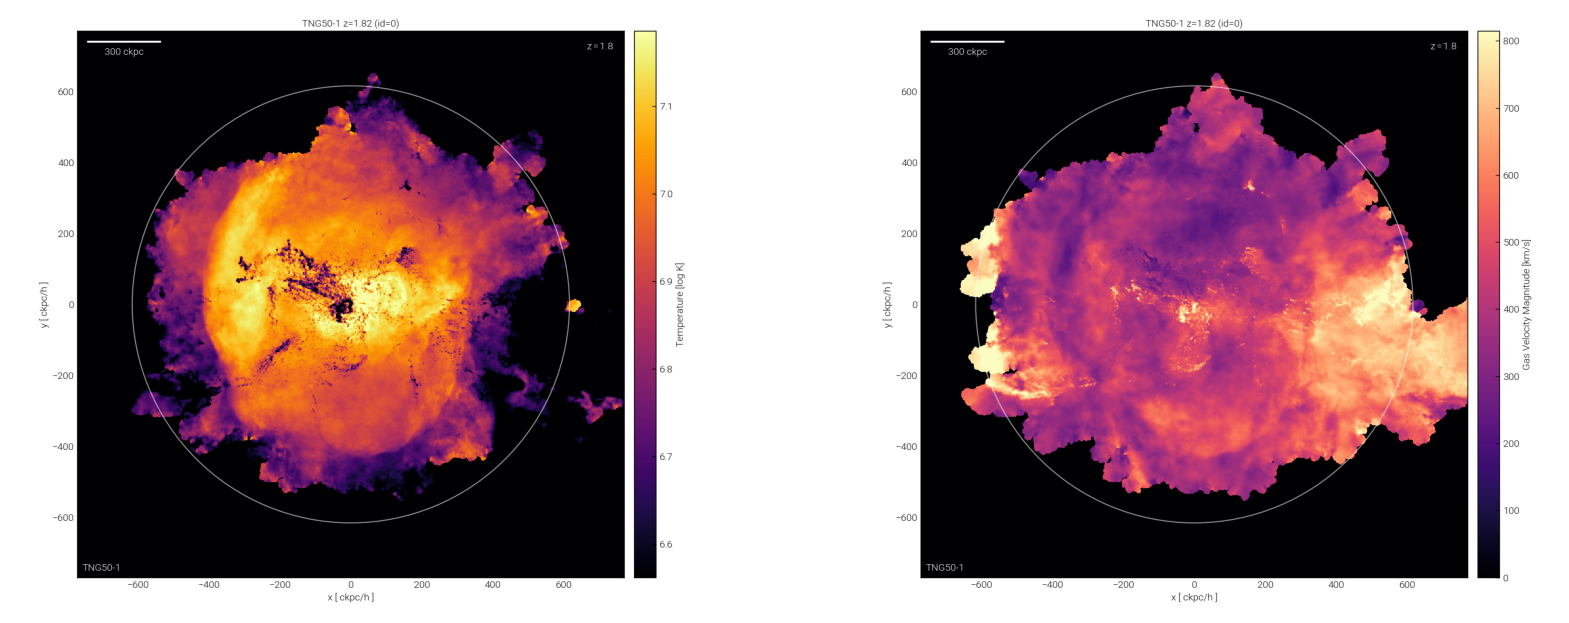

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))
filenames = ['temp.png', 'vmag.png']
for ax, filename in zip(axes, filenames):
    ax.imshow(plt.imread(filename))
    ax.axis('off')
